# Bayes Study_Lecture 6

##  6.1 Denominator and Posterior


课前回顾: 

- 先验是什么？
- 为什么需要先验，先验重要吗？
- 如何在模型中构建先验？

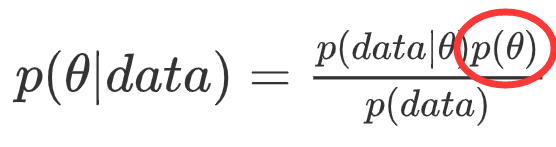

**不同的先验和数据(似然)会产生不同的后验分布**

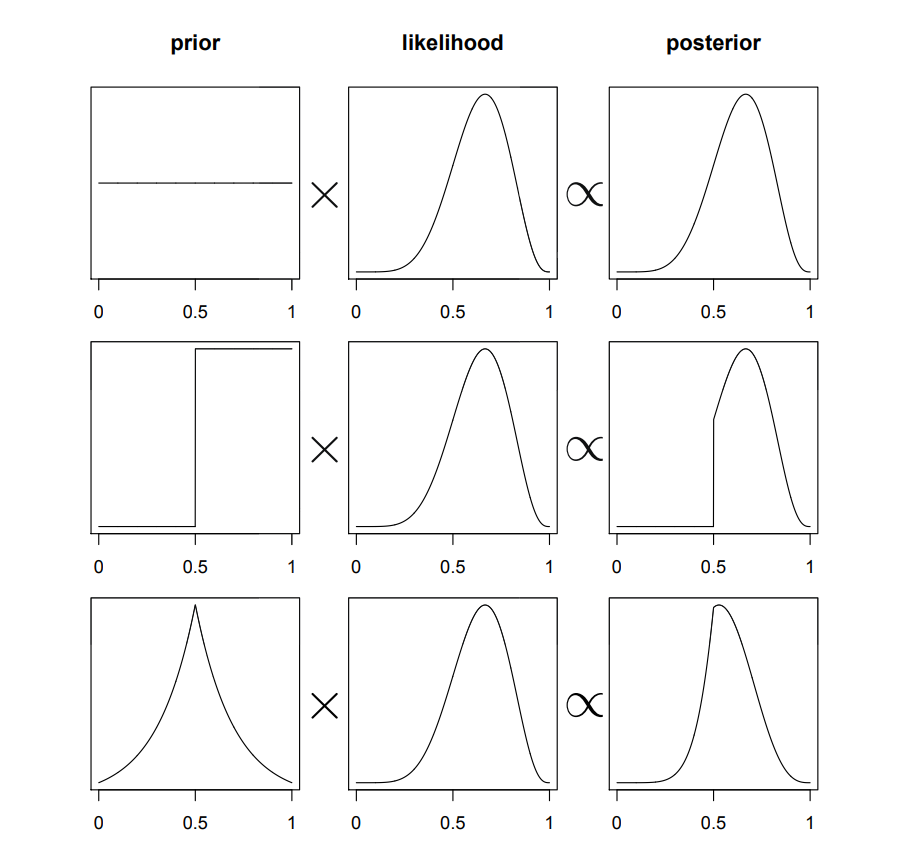


### Part 1: What is the denominator of Bayes' rule and what difficulty exists when we calculate the denominator ?

1. Understand the denominator of Bayes’ rule, $p(data)$, is a number that ensures that the posterior distribution is a valid probability distribution.

2. Understand why the calculation is complicated and practically intractable.

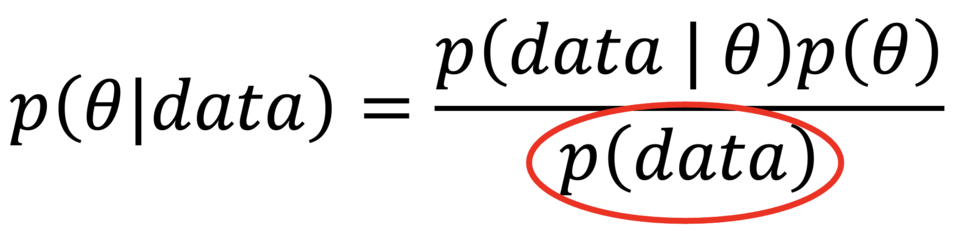

一个袋子里有四个鹅卵石，只有两种颜色：白和蓝。

两种颜色的石头各有几块是未知的 (Source: Statistical rethinking)。

根据已有的信息，可以判断四个石头颜色组合的可能情况有五种：

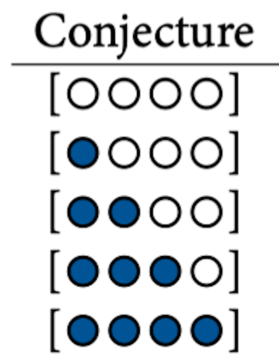

当我们摸到一个鹅卵石，我们得知这个鹅卵石是蓝色的，现在我们需要根据摸到的这个鹅卵石的颜色来判断盒子中蓝色鹅卵石的数量。

由于我们事先并没有得到任何有关这个袋子中鹅卵石的数量的信息，故我们假定这个盒子中蓝色鹅卵石所占比例的各种可能性是均匀分布的，且各种数量的蓝色鹅卵石比例的可能性之和为1。

In [1]:
import numpy as np # numpy 是专门用于数组运算的包
from scipy.stats import uniform # 从scipy.stats里载入均匀分布的函数
import matplotlib.pyplot as plt # matplotlib.pyplot 是专门用于画图的包

x = np.arange(start = 0, stop = 5, step = 1) # 起点为0，终点为5(不包括5)，步长为1生成5个数
y_prior = uniform.pdf(x,loc = 0,scale = 5)   # 均匀分布的概率密度函数,x为变量，0为均匀分布起点，5为均匀分布的点的数量

# 画图
plt.bar(x, y_prior, width=0.5)  # 条形图
plt.title("Prior")              # 添加标题
plt.ylabel("probability")       # 添加y轴标签

# 输入结果
print(f"袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4的情况下，先验概率分别为{y_prior}")

ModuleNotFoundError: No module named 'numpy'

我们假定X为摸到的球的颜色

$X \in \left \{ 0,1 \right \}$ 

$X = 0$ 代表白色鹅卵石

$X = 1$ 代表蓝色鹅卵石

当我们摸到一个鹅卵石，这只鹅卵石是蓝色鹅卵石，那么我们该如何推断袋子中蓝色鹅卵石的总数？

假定袋子中有$\alpha$个蓝色鹅卵石，$\alpha \in \left \{ 0,1,2,3,4 \right \}$

在不同$\alpha$条件下，观察到一个蓝色鹅卵石的概率为$Pr(X=1|Y = \alpha) = \alpha/4$

根据上节课学到的知识，我们知道这个是不同$\alpha$条件下，我们观察到一个鹅卵石是蓝色鹅卵石的似然。

In [ ]:
x = np.arange(start = 0, stop = 5, step = 1) # 起点为0，终点为5(不包括5)，步长为1生成5个数
y_likelihood = x/4  # Pr(X=1|Y = \alpha) = \alpha/4

# 画图
plt.bar(x,y_likelihood,width=0.5)  # 条形图
plt.title("Likelihood")            # 添加标题
plt.ylabel("likelihood")           # 添加y轴标签

print(f"袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4的情况下,似然分别为{y_likelihood}")

其中，$p(data|\theta)p(\theta)$ 可以表示为 $p(data,\theta)$ 

$p(data,\theta)$ 表示$\theta$和$data$的联合概率

有效的概率分布有两个特征：

- 每种情况下的概率都是非负数

- 所有情况下的概率之和为1

$p(data,\theta)$ 满足第一个特征，但不满足第二个特征

要描述已知摸出鹅卵石的颜色的情况下，袋子中鹅卵石有几个蓝色鹅卵石的情况，我们需要一个值来将 $p(data,\theta)$ 的值转化为1

在这个例子中，prior，likelihood分别代表什么？

prior代表我们对袋子里蓝色鹅卵石占比的各种可能性的信念

likelihood代表在每一种可能性下，摸出的蓝色鹅卵石的数量的概率

注意，prior 和 likelihood 关注的都是袋子里的蓝色鹅卵石的情况。

在袋子里摸出蓝色鹅卵石的概率是多少呢？

我们可以使用在袋子里摸出蓝色鹅卵石的概率作为分母。

我们应该如何计算袋子里摸出蓝色鹅卵石的概率呢？

由于我们不知道袋子里的蓝色鹅卵石的具体数量，所以我们需要计算各种情况下摸到蓝色鹅卵石的概率之和。

当$\theta$是离散参数时，$p(data)$的计算方式为

$P(data) =\sum_{\theta}^{} p(data,\theta)=\sum_{\theta}^{} p(data|\theta)p(\theta)$

当$\theta$是连续参数时，$p(data)$的计算方式为

$P(data) =\int_{\theta}^{} p(data,\theta) =\int_{\theta}^{} p(data|\theta)p(\theta)d\theta$

在本例中，摸到蓝色鹅卵石的概率$p(data)=1/5*0 + 1/5*1/4 + 1/5*2/4 + 1/5*3/4 + 1/5*4/4 = 1/2$

In [ ]:
x = np.arange(start = 0, stop = 5, step = 1)   # 起点为0，终点为5(不包括5)，步长为1生成5个数
y_margin = 1/2                                 # p(data) = \sum{p(data|\theta)p(\theta)}
y_posterior = (y_prior*y_likelihood)/y_margin  # P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} 

# 画图
plt.bar(x,y_posterior,width=0.5) # 条形图
plt.title("Posterior")           # 添加标题
plt.ylabel("Posterior")          # 添加y轴标签

print(f"袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4,5的情况下,后验概率分别为{y_posterior}")

若我们想知道摸到白色鹅卵石的情况，则

$X = 0$代表蓝色鹅卵石

$X = 1$代表白色鹅卵石

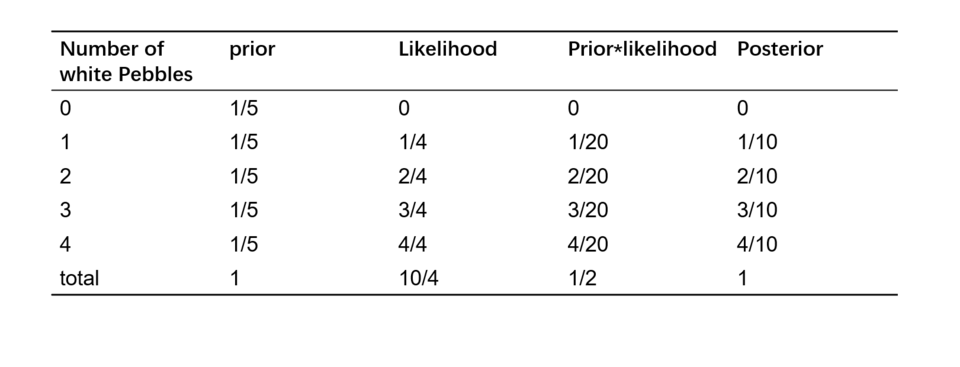

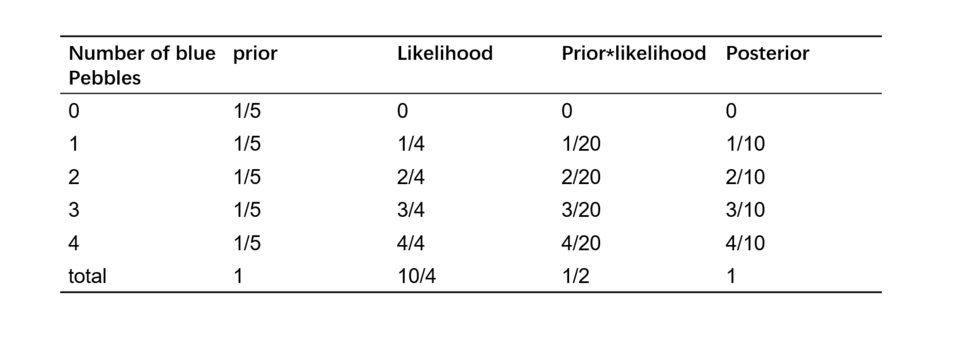

在将$p(data)$ 作为分母的情况下，$\frac{p(data,\theta)}{p(data)}$，即$p(posterior)$，是一个概率分布

为什么两种情况下, p(data)之和为1 ？

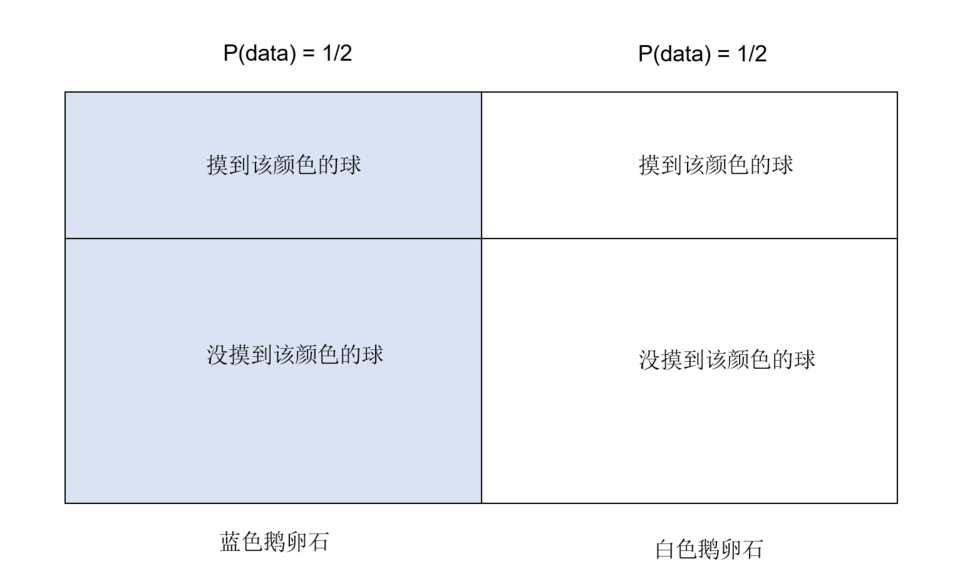

为什么将p(data)作为分母，$\frac{p(data,\theta)}{p(data)}$，即$p(posterior)$，是一个概率分布

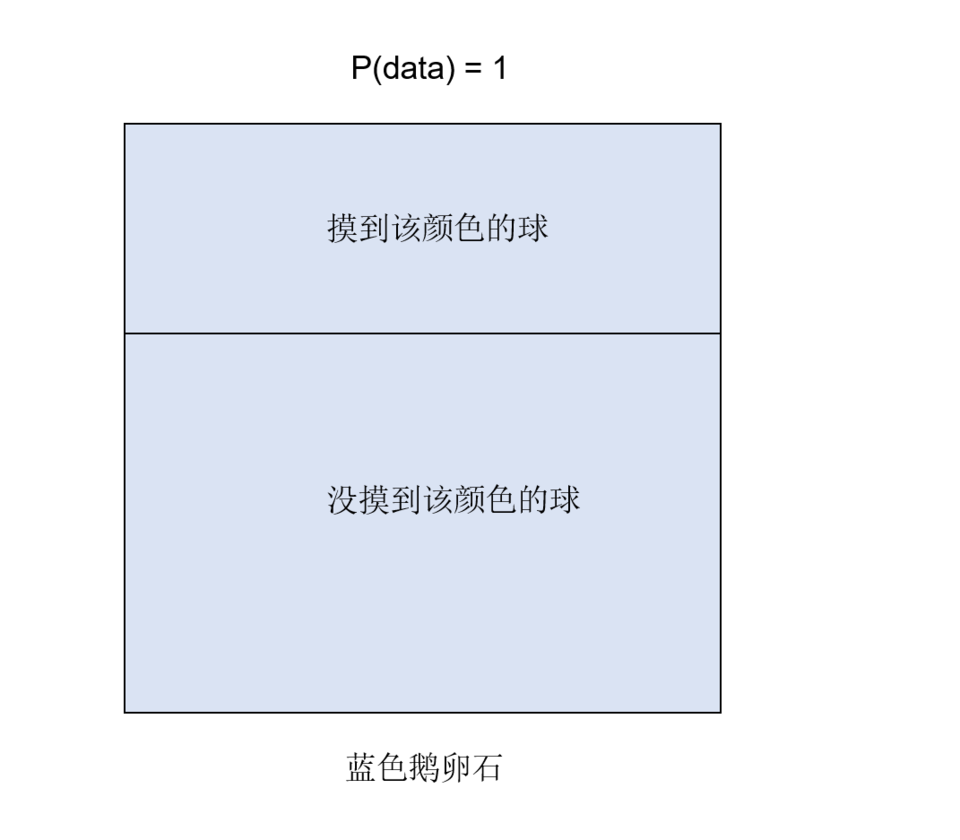

### Another example

回想一下先前提过的精神疾病诊断的例子。我们用$\theta$来表示两种可能的结果。

$\theta$ = 0, 无精神疾病

$\theta$ = 1, 有精神疾病

假定被诊断的人是从整个人群中随机抽取出的一个人，则我们可以使用人群中精神疾病人口的比例作为先验，假定该比例为1/4。

$p(x = 1) = 1/4$ or $p(\theta) = 1/4$

随后，我们从诊断测试中获得数据，并利用这些数据来重新评估该患者的诊断阳性的概率。为此，我们选择一个概率模型：

$p(positive | x=1) = 4/5$    (Accuracy, 患病被检测为阳性的概率)

$p(positive | x=0) = 1/10$  (假阳性，未患病被检测为阳性的概率)

检测结果为阳性时的总概率为：

$p(positive) = \sum_{x=0}^{1} p(positive|x) \times p(\theta) = p(positive|x = 0) \times p(x = 0) +p(positive|x = 1) \times p(x = 1)=1/10 \times 3/4 +4/5 \times 1/4  = 11/40$

In [ ]:
prior = np.array([3/4, 1/4])
likelihood = np.array([1/10, 4/5])
margin = np.sum(prior*likelihood)
posterior = (prior*likelihood)/margin

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)       # 子图1
plt.bar([0,1],prior)     # 画条形图
plt.title("Prior")       # 添加标题
plt.xlabel(r"$\theta$")  # 添加x轴标签
plt.ylabel("Prior")      # 添加y轴标签

plt.subplot(1,3,2)        # 子图2
plt.bar([0,1],likelihood) # 画条形图
plt.title("likelihood")   # 添加标题
plt.xlabel(r"$\theta$")   # 添加x轴标签
plt.ylabel("likelihood")  # 添加y轴标签

plt.subplot(1,3,3)        # 子图3
plt.bar([0,1],posterior)  # 画条形图
plt.title("Posterior")    # 添加标题
plt.xlabel(r"$\theta$")   # 添加x轴标签
plt.ylabel("Posterior")   # 添加y轴标签

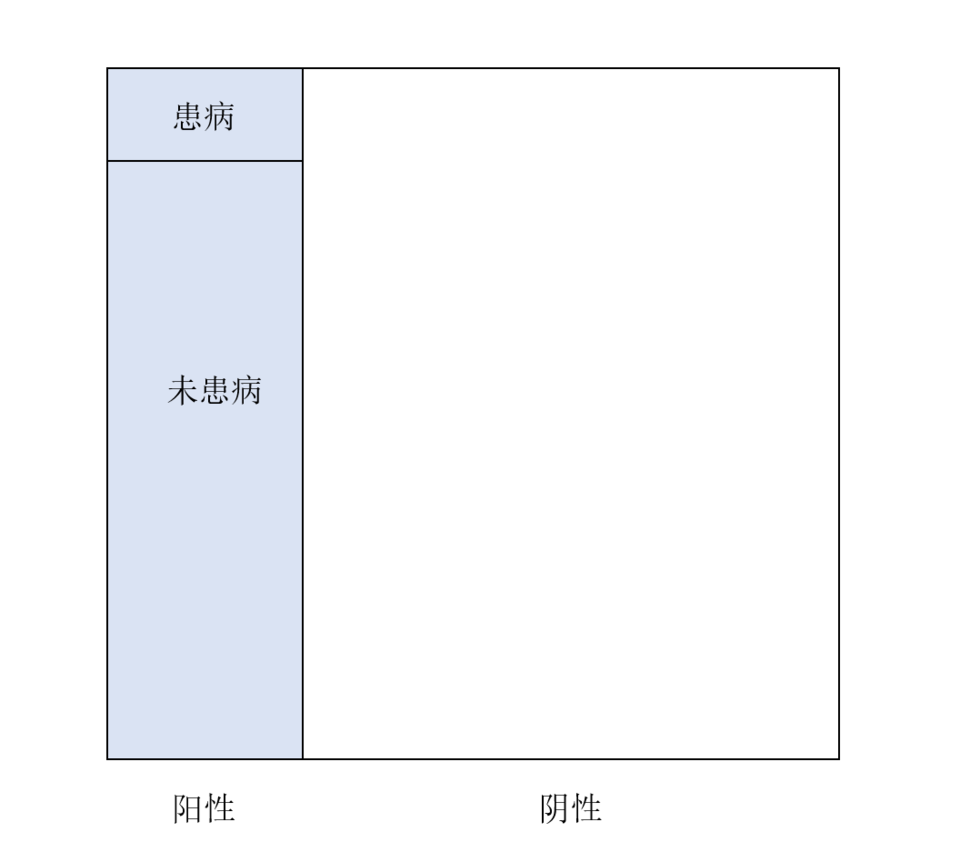


### The Difficulty with the Denominator

我们上面的例子仅涉及到一个参数的情况，因此对$p(data)$的计算较为容易，即：

当$\theta$是离散参数时（蓝色石头的比例），$p(data)$的计算方式为

$P(data) =\sum_{\theta}^{} p(data,\theta)=\sum_{\theta}^{} p(data|\theta)p(\theta)$

当$\theta$是连续参数时，$p(data)$的计算方式为

$P(data) =\int_{\theta}^{} p(data,\theta) =\int_{\theta}^{} p(data|\theta)p(\theta)d\theta$


**若涉及到2个参数的情况，则：**

当$\theta_1$，$\theta_2$是离散参数时，$p(data)$的计算方式为

$P(data) =\sum_{\theta_2}^{}\sum_{\theta_1}^{} p(data,\theta_1,\theta_2)= \sum_{\theta_2}^{}\sum_{\theta_1}^{} p(data|\theta_1,\theta_2)p(\theta_1,\theta_2)$

当$\theta_1$，$\theta_2$是连续参数时，$p(data)$的计算方式为

$P(data) =\int_{\theta_2}^{} \int_{\theta_1}^{} p(data,\theta_1,\theta_2) d\theta_1 d\theta_2 = \int_{\theta_2}^{} \int_{\theta_1}^{} p(data|\theta_1,\theta_2)p(\theta_1,\theta_2)d\theta_1d\theta_2$ 


**若涉及到100个参数的情况，则：**

当$\theta_1$,$\theta_2$...$\theta_100$是离散参数时，$p(data)$的计算方式为

$P(data) =\sum_{\theta_{100}}^{}...\sum_{\theta_2}^{}\sum_{\theta_1}^{} p(data,\theta_1,\theta_2,...,\theta_{100})= \sum_{\theta_{100}}^{}...\sum_{\theta_2}^{}\sum_{\theta_1}^{} p(data|\theta_1,\theta_2,...,\theta_{100})p(\theta_1,\theta_2,...,\theta_{100})$

当$\theta_1$,$\theta_2$是连续参数时，$p(data)$的计算方式为

$P(data) =\int_{\theta_{100}}^{}...\int_{\theta_2}^{} \int_{\theta_1}^{} p(data,\theta_1,\theta_2,...,\theta_{100}) d\theta_1 d\theta_2...d\theta_{100} = \int_{\theta_{100}}^{}...\int_{\theta_2}^{} \int_{\theta_1}^{} p(data|\theta_1,\theta_2,...,\theta_{100})p(\theta_1,\theta_2,...,\theta_{100})d\theta_1d\theta_2...d\theta_{100}$ 

计算高维积分往往是困难的

连续型随机变量一般是积分没有闭形式（colsed-form）解导致的计算不可行

对于离散型随机变量一般是指数级求和（当参数是K维向量, 且每一维有S种可能取值, 那么计算复杂度就是$O(S_{K})$ ，是计算不可行的

在$\theta$是离散参数的情况下，我们可以通过大量的计算来求出$p(data)$的值

但在$\theta$是连续参数的情况下，我们很难求出$p(data)$的积分

### How to Dispense with the Difficulty: Bayesian Computation

- 针对具体的总体分布为参数选择合适的先验分布，这类方法的典型是共轭先验（conjugate prior）

- 另一类是使用近似算法，例如：证据近似（Evidence Approximation）、变分推理（Variational Inference）、吉布斯抽样（Gibbs Sampling）等。

**对于某些似然函数（likehood），如果您选择某个先验，后验的分布与先验的分布相同。这样的先验被称为共轭先验。**

我们以抛硬币为例

其中：

θ是成功的概率，

x是成功次数。

n是试验的总数

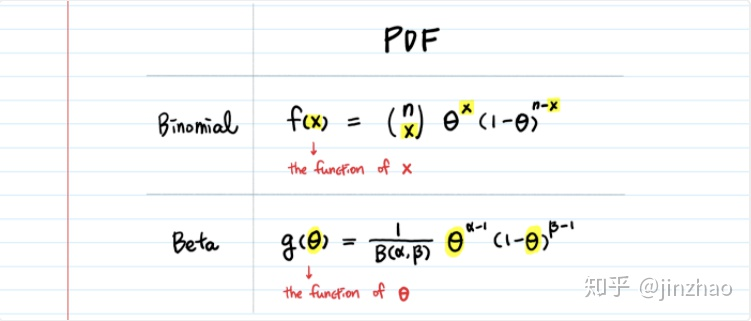

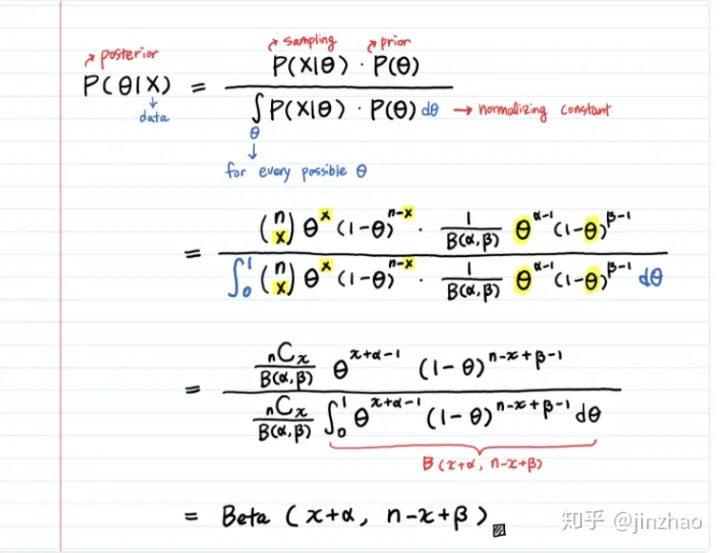

这样我们可以通过公式推导求出后验分布。